In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gou_step(x, dt, mu, theta, sigma):
    "geometric ornstein-uhlenbeck process"
    eta = np.random.randn(x.shape[0]) * np.sqrt(dt)

    dx= -theta * ( x - mu)* dt + sigma * x * eta
    return dx

In [3]:
N = 10000
T = 20

n_steps = 10000
dt = T/n_steps
params = {
    "theta": 5,
    "sigma": 0.1,
    "mu":10
}

times_array= np.arange(0, n_steps )*dt

print(dt)
print(1/params["theta"])

0.002
0.2


In [4]:

x_0 = np.ones(N)*2

X = [x_0]
x = x_0 + 0
for _ in range(n_steps-1):
    x = x + gou_step(x,dt, **params)
    X.append(x)
    #print(x[0])

X = np.array(X)

In [5]:
X.shape

(10000, 10000)

In [6]:
data = X[-1].flatten()
data.shape

(10000,)

In [7]:
#test normality of the data
import scipy
scipy.stats.normaltest(np.log(data))

NormaltestResult(statistic=7.131248541701042, pvalue=0.028279326013711307)

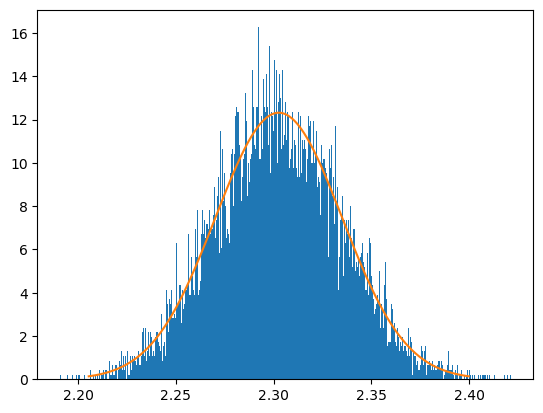

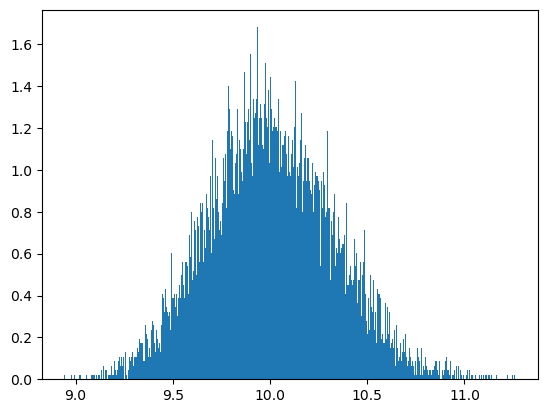

In [8]:
plt.hist(np.log(data), bins=500, density=True)
# compute mean and average
mu = np.mean(np.log(data))
sigma = np.std(np.log(data))
#plot a gaussian with same mean and variance
x = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
y = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
plt.plot(x,y)
#plt.xlim(2.5,3.5)
plt.show()

plt.hist(data, bins=500, density=True)
plt.show()

In [9]:
x_mean = np.mean(X, axis=1)
x_var = np.var(X, axis=1)

x_var.shape

(10000,)

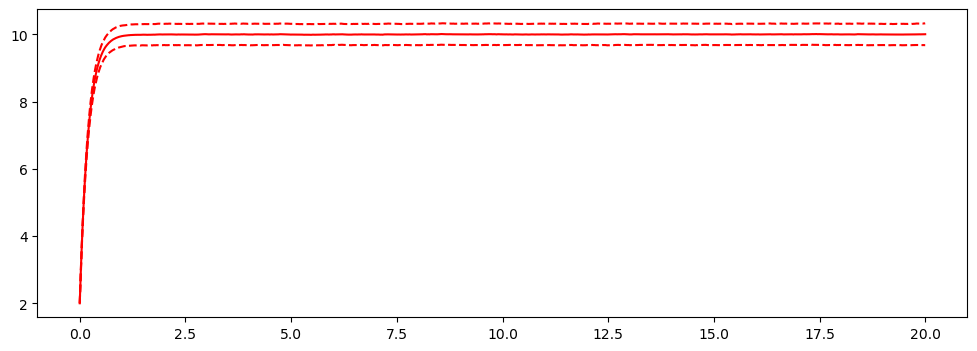

In [10]:
plt.figure(figsize=(12,4))
# plt.plot(times_array,X,  'g', alpha = 0.1, )
plt.plot(times_array,x_mean, 'r')
plt.plot(times_array,x_mean-np.sqrt(x_var), 'r--')
plt.plot(times_array,x_mean + np.sqrt(x_var), 'r--')
plt.show()

In [11]:
def exact_mean(x_0, t, mu, theta, sigma):
    return x_0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def exact_second_moment(x_0, t, mu, theta, sigma):
    numerator = (
        np.exp(-2 * theta * t) * (
            2 * mu**2 * theta * (
                theta * np.exp(sigma**2 * t) +
                (theta - sigma**2) * np.exp(2 * theta * t) +
                (sigma**2 - 2 * theta) * np.exp(theta * t)
            ) +
            2 * mu * x_0 * theta * (
                2 * theta - sigma**2
            ) * (
                np.exp(theta * t) - np.exp(sigma**2 * t)
            ) +
            x_0**2 * (
                2 * theta**2 - 3 * theta * sigma**2 + sigma**4
            ) * np.exp(sigma**2 * t)
        )
    )

    denominator = 2 * theta**2 - 3 * theta * sigma**2 + sigma**4

    return numerator / denominator


def exact_var(x_0, t, mu, theta, sigma):
    return exact_second_moment(x_0, t, mu, theta, sigma) - exact_mean(x_0, t, mu, theta, sigma)**2


def var_theoretical(mu,sigma,theta):
    num = 2*theta*mu**2*(theta-sigma**2)
    den = 2*theta**2 - 3*theta*sigma**2 + sigma**4
    return num/den - mu**2


In [9]:
x_mean_exact = exact_mean(x_0[0], times_array, **params)
x_var_exact = exact_var(x_0[0],times_array, **params)

In [10]:
# #plot it
#
# plt.figure(figsize=(12,6))
# plt.plot(times_array, X, 'b', alpha = 0.01)
# plt.plot(times_array,x_mean, 'r', label = "Empirical Mean")
# plt.plot(times_array,x_mean-np.sqrt(x_var), 'r--')
# plt.plot(times_array,x_mean + np.sqrt(x_var), 'r--')
# plt.plot(times_array, x_mean_exact, 'g', label = "Theoretical Mean")
# plt.plot(times_array, x_mean_exact-np.sqrt(x_var_exact), 'g--')
# plt.plot(times_array, x_mean_exact + np.sqrt(x_var_exact), 'g--')
# plt.xlabel("Time")
# plt.ylabel("Spine Size")
# fig_title= f"Spine Size: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
# plt.title(fig_title)
# plt.legend()
#
# fig_name = fig_title.replace(" ", "_").replace(":", "_")
# #save figure with transparent background as pdf
# plt.savefig(f"{fig_name}.png", transparent=True)
# plt.show()

In [23]:
print(x_var[-100:].mean())

mu = params["mu"]
sigma = params["sigma"]
theta = params["theta"]

num = 2*theta*mu**2*(theta-sigma**2)
den = 2*theta**2 - 3*theta*sigma**2 + sigma**4

var = var_theoretical(**params)



print(var)

4.4898034234309305
0.010101010101010166


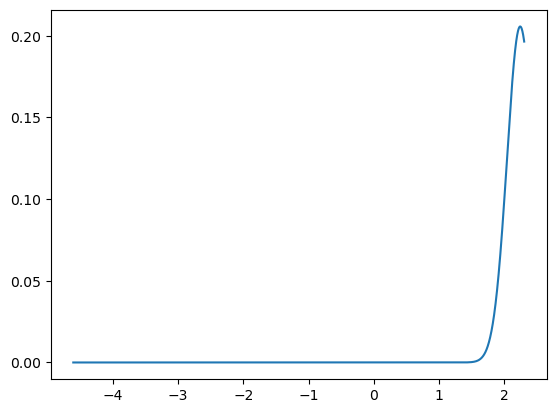

In [12]:
# create a lognormal distribution

def lognormal_distribution(x, mu, sigma):
    return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((np.log(x)-mu)/sigma)**2)

x = np.linspace(0.01, 10, 1000)

mean_LN = np.log(mu**2/np.sqrt(var + mu**2))
var_LN = np.log(1 + var/mu**2)


mu_x = x_mean[-1]
sigma_x = np.sqrt(x_var[-1])

mu_emp = np.log(mu_x**2/np.sqrt(sigma_x**2 + mu_x**2))
var_emp = np.log(1 + sigma_x**2/mu_x**2)

y = lognormal_distribution(x, mean_LN, np.sqrt(var_LN))
y_emp = lognormal_distribution(x, mu_emp, np.sqrt(var_emp))

#y = lognormal_distribution(x, 1, 1)


plt.plot(np.log(x),y)
plt.show()

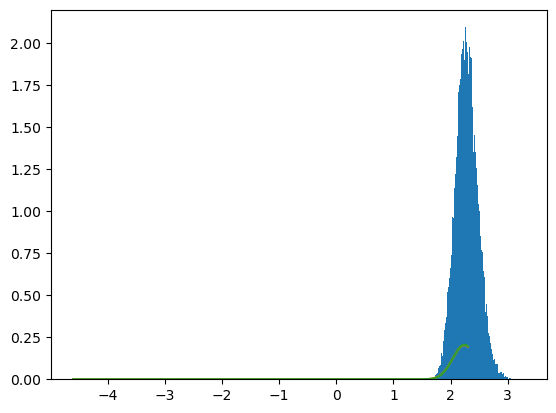

In [13]:
plt.hist(np.log(X[-1]), bins=100, density=True)
plt.plot(np.log(x),y_emp)
#plot the lognormal distribution on top
plt.plot(np.log(x),y)
plt.show()

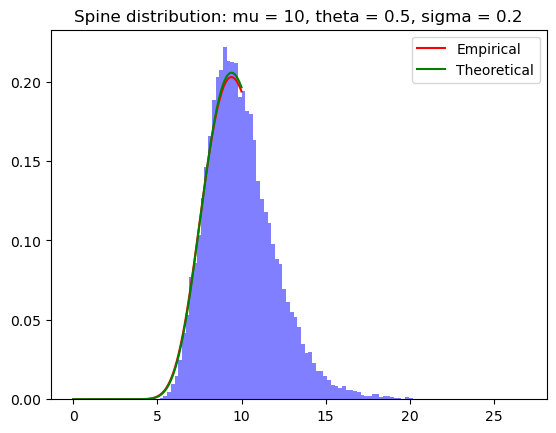

In [14]:
#make hist with blue bars
plt.hist(X[-1], bins=100, density=True, color='b', alpha=0.5)
plt.plot(x,y_emp, 'r')
plt.plot(x,y, 'g')
#plot the lognormal distribution on top
fig_title= f"Spine distribution: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
plt.title(fig_title)
plt.legend(["Empirical", "Theoretical"])


fig_name = fig_title.replace(" ", "_").replace(":", "_")
#save figure with transparent background as pdf
plt.savefig(f"{fig_name}.pdf", transparent=True)
plt.show()

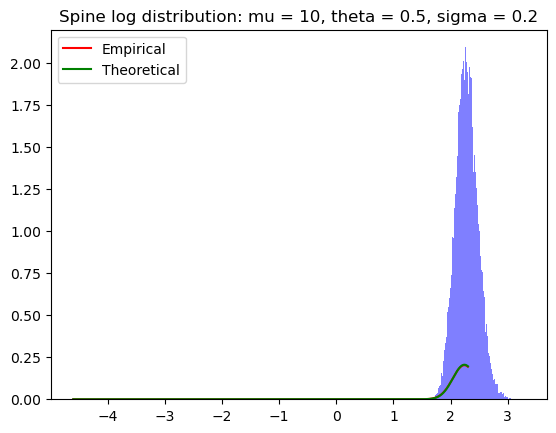

In [15]:
# the same in log-scale
plt.hist(np.log(X[-1]), bins=100, density=True, color='b', alpha=0.5)
plt.plot(np.log(x),y_emp, 'r')
plt.plot(np.log(x),y, 'g')
#plot the lognormal distribution on top
fig_title= f"Spine log distribution: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
plt.title(fig_title)
plt.legend(["Empirical", "Theoretical"])

fig_name = fig_title.replace(" ", "_").replace(":", "_")
#save figure with transparent background as pdf
plt.savefig(f"{fig_name}.pdf", transparent=True)


plt.show()


In [ ]:
import scipy

scipy.stats.normaltest(np.log(X[-1]))

In [ ]:
print(mu_emp, var_emp)
print(mean_LN, var_LN)

In [ ]:
print(mu_x, sigma_x)
print(mu, np.sqrt(var))

In [ ]:
var_LN

In [ ]:
def mu_LN_from_params(mu, sigma, theta):
    return np.log(mu * np.sqrt(1 - sigma**2/2*theta))

def sigma_LN_from_params(mu, sigma, theta):
    return np.sqrt(np.log(1/(1  - sigma**2/(2*theta))))



In [ ]:
print(sigma_LN_from_params(mu, sigma, theta)**2)

In [11]:
#compue the autocorrelation of the process

def autocovariance(x, lag):

    if lag == 0:
        return np.var(x)

    n = len(x)
    x_mean = np.mean(x)
    x_lag = x[lag:]
    x = x[:-lag]
    return np.sum((x - x_mean)*(x_lag - x_mean))/n

In [12]:


for i in range(0, 100):
    print(autocovariance(X[5000:,0], i))

1.1759736751798122
1.1713857664654583
1.166930155022385
1.162494142912129
1.158114482126371
1.1536515961321105
1.1492426787703727
1.1448662074111198
1.1402135738590764
1.135576485733943
1.1309169685886937
1.1261181233763462
1.1214357195440305
1.116776486068717
1.1120740724837446
1.107430610807974
1.102832912330869
1.0984634488814635
1.0941896607625161
1.0898219412386179
1.0851881833371768
1.0808384825809243
1.0764226391007796
1.0722070233533683
1.0678897480362677
1.0636520638986935
1.0594427563796707
1.05530857058592
1.051273559235406
1.0473517355065611
1.0436375989925144
1.0399265390372665
1.0363470519173847
1.0329251636120997
1.0295077268153434
1.0260189875784869
1.0224432472021416
1.018815369006616
1.0150543158070842
1.0111131571812237
1.007134819721388
1.0030823027992644
0.998863515487489
0.9946647823927873
0.990416185480588
0.9860192073210786
0.98160384411729
0.9772460586449097
0.972981284426128
0.968700776085796
0.9645120603851279
0.9603365193554657
0.956135428993395
0.9523178163

In [13]:
tot_a_cov = []
time_range_cov = np.arange(0, 6000)
for m in range(100):
    a_cov = [autocovariance(X[1000:,m], i) for i in time_range_cov]
    tot_a_cov.append(a_cov)



NameError: name 'mu' is not defined

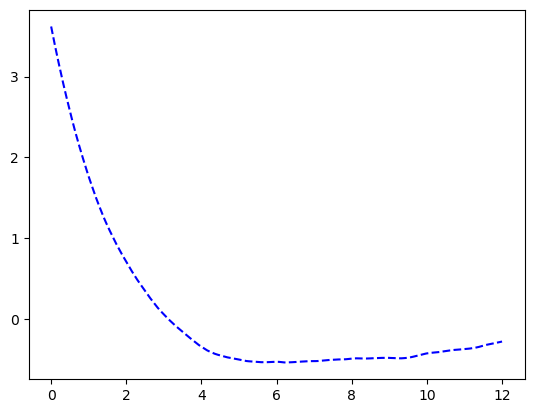

In [14]:
#compute the time interval

#plt.plot(dt* np.arange(0, 4000), np.array(tot_a_cov).T, 'r', alpha = 0.1)
plt.plot(dt* time_range_cov, np.array(tot_a_cov).T.mean(axis=1), 'b--')
# plot a decaying exponential

plt.plot(dt* time_range_cov,mu**2 * sigma**2 / (2*theta-sigma**2) *np.exp(-theta*time_range_cov*dt))

In [ ]:
mu**2 * sigma**2 / (2*theta-sigma**2)

In [ ]:
var_theoretical(**params)

In [24]:
def my_autocov(X, lag):
    x = X[-1]
    y = X[-1-lag]
    return np.mean((x - np.mean(x))*(y - np.mean(y)))

In [25]:
a_cov_2 = [my_autocov(X, i) for i in time_range_cov]



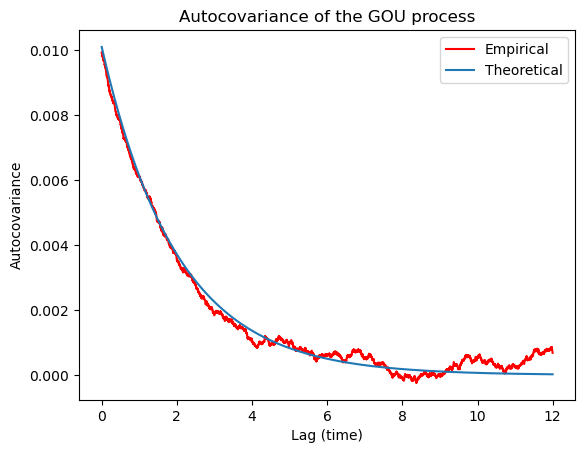

In [32]:
plt.plot(dt* time_range_cov, a_cov_2, 'r', label = "Empirical")
#plt.plot(dt* time_range_cov, np.array(tot_a_cov).T.mean(axis=1), 'b--')
plt.plot(dt* time_range_cov,mu**2 * sigma**2 / (2*theta-sigma**2) *np.exp(-theta*time_range_cov*dt), label="Theoretical")
plt.xlabel("Lag (time)")
plt.ylabel("Autocovariance")
plt.title("Autocovariance of the GOU process")
plt.legend()
plt.savefig("Autocovariance_GOU.png", transparent=True)
plt.show()

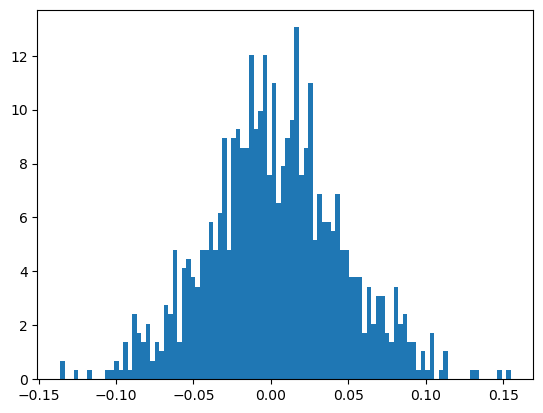

In [68]:
diff = X[-1]-X[-100]
diff2 = X[-100] - X[-200]

plt.hist(diff, bins=100, density=True)
plt.show()

-0.17968155617036083


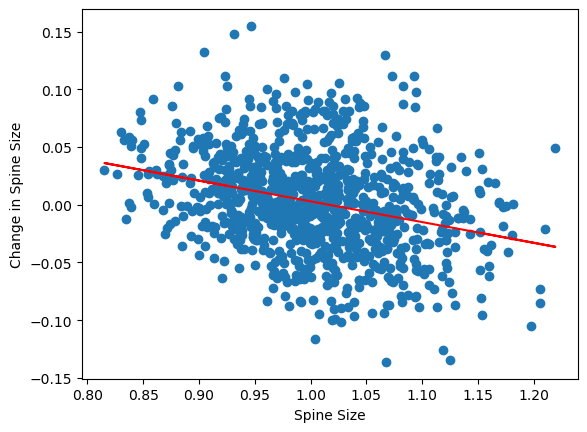

In [71]:
plt.scatter(X[-100], diff)
plt.xlabel("Spine Size")
plt.ylabel("Change in Spine Size")

#do a linear fit and plot it
m, b = np.polyfit(X[-100], diff, 1)
print(m)
plt.plot(X[-100], m*X[-100] + b, 'r')
plt.savefig("Change_in_spine_size.png", transparent=True)
plt.show()



-0.0955021808551507


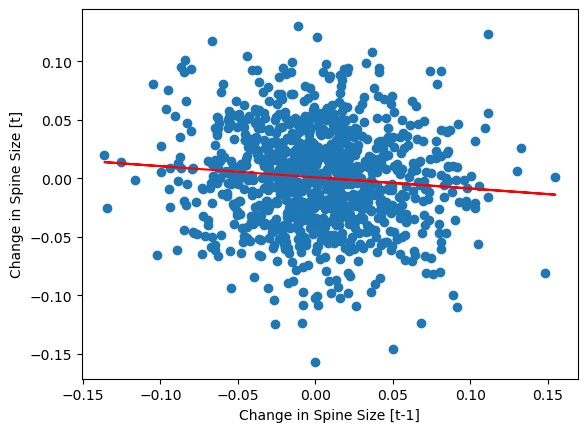

In [72]:
plt.scatter(diff, diff2)
plt.xlabel("Change in Spine Size [t-1]")
plt.ylabel("Change in Spine Size [t]")

#do a linear fit and plot it
m, b = np.polyfit(diff, diff2, 1)
print(m)
plt.plot(diff, m*diff + b, 'r')
#plt.savefig("Change_in_spine_size_2.png", transparent=True)
plt.show()
